Import an image to measure the background noise in it.

Note that Dragonfly007 (T13110627) had the G filter installed.

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid

%matplotlib inline

Looking at the actual Dragonfly data...

In [11]:
imagefile='/Users/lokhorst/Desktop/T13110627_36_light.fits'
d,h = fits.getdata(imagefile,header=True)

print h['EXPTIME']

600.0


1907.0
2028.0
266.424744741
1907.0
60.1782741629


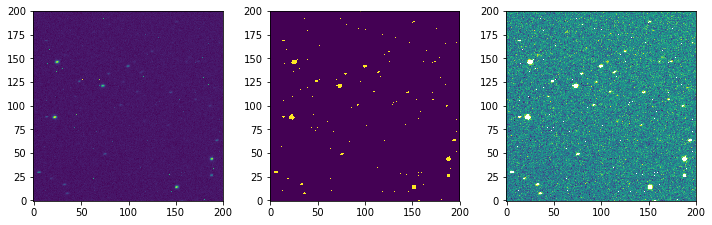

In [20]:
def plotdata(data,ax=None,bounds=None,colorbar=False):
    if ax is None:
        fig = plt.figure(figsize=(6, 3.2))
        ax = fig.add_subplot(111)
        oneplot=True
        ax.set_title('Pretend Data')
    if bounds is None:
        img = ax.imshow(data,origin='lower')
    else:
        img = ax.imshow(data,origin='lower',vmin=bounds[0],vmax=bounds[1])
    ax.set_aspect('equal')
    
    if colorbar:
        div = axgrid.make_axes_locatable(ax)
        cax = div.append_axes("right",size="10%",pad=0.15)
        cbar = plt.colorbar(img,cax=cax,orientation='vertical')#,boundaries=np.linspace(0,90000))
        cbar.ax.tick_params()

# Plot a portion of the image
smaller_d = d[200:400,200:400]
print np.median(smaller_d)
print np.median(d)
print np.std(smaller_d)
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(10, 16))
plotdata(np.log10(smaller_d),ax=ax1)

# Make a 3sigma mask
mask = np.zeros(smaller_d.shape)
med = np.median(smaller_d)
sigma = np.std(smaller_d)
mask[smaller_d>(med+1.*sigma)]=1.

# Plot the mask
plotdata(mask,ax=ax2)

# Try and mask the data with the 3sigma mask
mx = np.ma.masked_array(smaller_d, mask=mask)
print np.ma.median(mx)
print np.ma.std(mx)

plotdata(mx,ax=ax3)

# grow the mask a bit in all directinos
#growmask = morphology.grey_dilation(mask,(3,3))

plt.tight_layout()

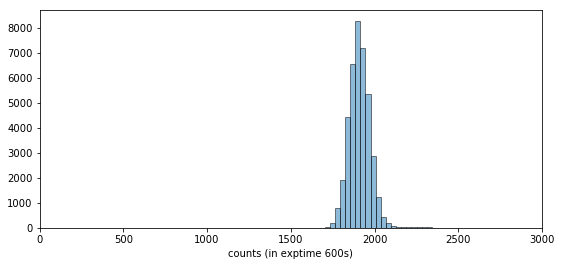

In [18]:
fig, (ax1) = plt.subplots(1, 1, figsize=(9, 4))
ax1.hist(np.ravel((smaller_d)),edgecolor='black', alpha = 0.5,bins=500)
ax1.set_xlim(0,3000)
ax1.set_xlabel('counts (in exptime 600s)')

# line for the median of the total data

# line for the median of the masked array

# line for the standards deviations of total data and of the masked array

plt.show()

The noise should be distributed in some normal or Poisson distribution, and that is what we see here.  To calulate the standard deviation, we could take the standard deviation of the masked array above.  Or we could choose a limit here based on the standard deviation of the 